In [7]:
import warnings
import logging


warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [8]:
from utils import make_environments
from utils import pearl_utils
from configs  import  spot_defaults as defaults

from utils.reward_functions import log_reward_function,cumulative_reward_function,sharpe_reward_function
from utils. utils import make_hidden_dims
import optuna
from optuna.samplers import TPESampler
from neuralforecast.core import NeuralForecast
from Pearl.pearl.utils.instantiations.environments.gym_environment import GymEnvironment
from Pearl.pearl.utils.functional_utils.train_and_eval.online_learning import online_learning
import datetime

import numpy as np
import pickle

In [9]:
# model=NeuralForecast.load('MultiHeadForecastingModel/')

Seed set to 6


Seed set to 19
Seed set to 16


['data/binanceus-DOGEUSDT-1h.pkl']


100%|██████████| 78/78 [00:00<00:00, 10919.75it/s]
1it [00:00, 16.88it/s]


,open,high,low,close,volume,y,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K,ds,unique_id,symbol
date_close,,,,,,,,,,,,,,,,,,,,
2024-01-01 10:00:00,0.08975,0.08976,0.08975,0.08976,6209.0,0.08976,-0.065217,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,2024-01-01 10:00:00,25,DOGEUSDT
2024-01-01 11:00:00,0.08977,0.09012,0.08972,0.09012,13750.0,0.09012,-0.021739,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.000008,0.000004,100.000000,0.0,2024-01-01 11:00:00,25,DOGEUSDT
2024-01-01 12:00:00,0.09008,0.09008,0.08992,0.08992,583.0,0.08992,0.021739,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.000004,0.000004,62.566845,0.0,2024-01-01 12:00:00,25,DOGEUSDT
2024-01-01 13:00:00,0.08995,0.09046,0.08995,0.09040,12750.0,0.09040,0.065217,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.000020,0.000009,80.974284,0.0,2024-01-01 13:00:00,25,DOGEUSDT
2024-01-01 14:00:00,0.09018,0.09053,0.09018,0.09053,5594.0,0.09053,0.108696,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.000033,0.000016,83.360761,0.0,2024-01-01 14:00:00,25,DOGEUSDT


Index(['open', 'high', 'low', 'close', 'volume', 'y', 'feature_hour_of_day',
       'feature_day_of_week', 'feature_day_of_month', 'feature_day_of_year',
       'feature_BBANDS_BB_UPPER', 'feature_BBANDS_BB_MIDDLE',
       'feature_BBANDS_BB_LOWER', 'feature_MACD_MACD', 'feature_MACD_SIGNAL',
       'feature_14_period_RSI', 'feature_14_period_STOCH_%K', 'ds',
       'unique_id', 'symbol'],
      dtype='object')


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

2024-10-18 12:00:00 2024-11-17 12:00:00


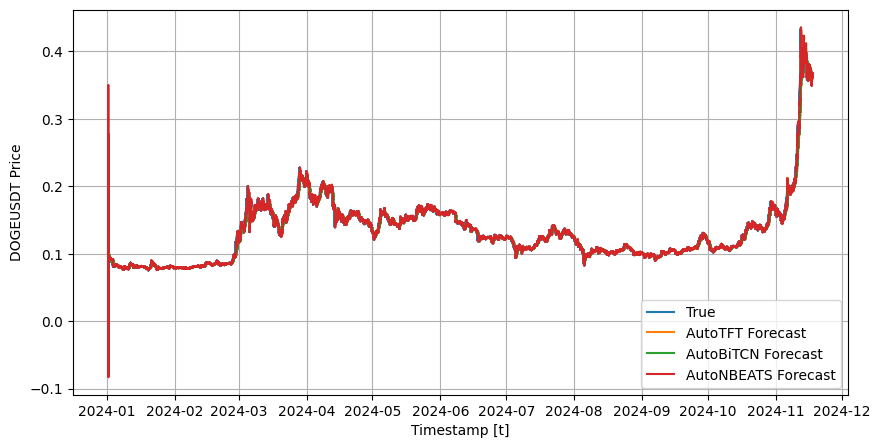

In [10]:
reward_functions=[log_reward_function,cumulative_reward_function,sharpe_reward_function]
train_env,test_env=make_environments.make_envs(reward_function=log_reward_function)


In [11]:
today=datetime.datetime.now().strftime('%Y-%m-%d')
study = optuna.create_study(study_name=f"pearl-2024-11-12-hp-search",
                            directions=["maximize", "maximize"],
                            storage="sqlite:///pearl_hyper_parameters.sqlite3",
                            load_if_exists=True,
                            sampler=TPESampler()
                            )


[I 2024-11-17 11:37:39,585] Using an existing study with name 'pearl-2024-11-12-hp-search' instead of creating a new one.


In [12]:
# print(f"Best value: {study.best_value} (params: {study.best_params})")
best_trials=study.best_trials
best_trials

[FrozenTrial(number=16, state=TrialState.COMPLETE, values=[1084.2016722520668, 117.84], datetime_start=datetime.datetime(2024, 11, 12, 13, 32, 22, 388417), datetime_complete=datetime.datetime(2024, 11, 12, 13, 35, 46, 59501), params={'reward_function': 2, 'algorithm': 'ddqn', 'n_layers': 2, 'n_units': 128, 'training_rounds': 13, 'learning_rate': 3.53300011287604e-05, 'discount_factor': 0.8516537625726973, 'batch_size': 128, 'target_update_freq': 5, 'soft_update_tau': 0.6916880729632867, 'is_conservative': True, 'use_lstm': False, 'conservative_alpha': 0.9985474810108794, 'learn_after_episode': False, 'learning_steps': 10, 'n_epochs': 500}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'reward_function': CategoricalDistribution(choices=(0, 1, 2)), 'algorithm': CategoricalDistribution(choices=('dqn', 'ddqn')), 'n_layers': IntDistribution(high=3, log=False, low=1, step=1), 'n_units': CategoricalDistribution(choices=(64, 128, 256, 512)), 'training_rounds': IntDistr

In [13]:


if -1 in [np.sign(p) for p in test_env.positions]:
    market_type='Futures'
else:
    market_type='Spot'
symb=defaults.target_pair.replace('/','')

agent_path=f'Agent/pearl_{symb}_{market_type}_model.pkl'

agent_path


'Agent/pearl_DOGEUSDT_Spot_model.pkl'

In [15]:
[i for i in range(5)]

[0, 1, 2, 3, 4]

In [16]:
best_agents={}
for i in range(4):
    agent,learning_params=pearl_utils.load_agent_from_study(study_path="sqlite:///pearl_hyper_parameters.sqlite3",
                                            study_name='pearl-2024-11-12-hp-search',
                                            action_space_dim=2,
                                            observation_space_dim=30,
                                            version=i)
    
    agent,profit,n_trades=pearl_utils.train_production_agent(agent,
                                learning_params,
                                train_env=train_env,
                                test_env=train_env,
                                save_path=agent_path)
    best_agents[profit]=agent
agent=best_agents[max(best_agents)]
    

[I 2024-11-17 11:37:54,630] Using an existing study with name 'pearl-2024-11-12-hp-search' instead of creating a new one.
  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/84000 [00:00<?, ?it/s]

  0%|          | 0/500 [03:43<?, ?it/s]


Testing Return AVG Profit: 999.9449999999998, AVG Number of Trades: 0.55


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/84000 [00:00<?, ?it/s]

  0%|          | 0/500 [03:46<?, ?it/s]
[I 2024-11-17 11:45:27,966] Using an existing study with name 'pearl-2024-11-12-hp-search' instead of creating a new one.
  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/84000 [00:00<?, ?it/s]

  0%|          | 0/500 [02:23<?, ?it/s]


Testing Return AVG Profit: 999.9489999999996, AVG Number of Trades: 0.51


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/84000 [00:00<?, ?it/s]

  0%|          | 0/500 [02:23<?, ?it/s]
[I 2024-11-17 11:50:19,106] Using an existing study with name 'pearl-2024-11-12-hp-search' instead of creating a new one.
  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:49<?, ?it/s]


Testing Return AVG Profit: 999.9539999999996, AVG Number of Trades: 0.46


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:50<?, ?it/s]
[I 2024-11-17 11:52:03,614] Using an existing study with name 'pearl-2024-11-12-hp-search' instead of creating a new one.
  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:22<?, ?it/s]


Testing Return AVG Profit: 1012.5094668124718, AVG Number of Trades: 1.9


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:22<?, ?it/s]


In [17]:
# agent,learning_params=pearl_utils.load_agent_from_study(study_path="sqlite:///pearl_hyper_parameters.sqlite3",
#                                             study_name='pearl-2024-11-12-hp-search',
#                                             action_space_dim=2,
#                                             observation_space_dim=30,
#                                             version=1)

# agent=pearl_utils.train_production_agent(agent,
#                              learning_params,
#                              train_env=train_env,
#                              test_env=train_env,
#                              save_path=agent_path)

In [24]:
best_agents

{999.9449999999998: <Pearl.pearl.pearl_agent.PearlAgent at 0x345189e70>,
 999.9489999999996: <Pearl.pearl.pearl_agent.PearlAgent at 0x345bf86a0>,
 999.9539999999996: <Pearl.pearl.pearl_agent.PearlAgent at 0x3a32b46d0>,
 1012.5094668124718: <Pearl.pearl.pearl_agent.PearlAgent at 0x3a7f84f10>}

In [18]:
profit,n_trades=pearl_utils.test_pearl_model(agent,test_env)
print(f"Testing Return AVG Profit: {profit}, AVG Number of Trades: {n_trades}")

Testing Return AVG Profit: 1284.8120247137942, AVG Number of Trades: 34.08


In [25]:
pickle.dump(agent,open(agent_path,'wb'))
agent=pickle.load(open(agent_path,'rb'))

In [1]:
import certifi
certifi.where()

'/Users/sebastiancoombs/anaconda3/envs/pearlenv/lib/python3.10/site-packages/certifi/cacert.pem'

In [20]:
# pickle.dump(agent.policy_learner.state_dict(),open(agent_path,'wb'))

In [21]:
# weights=pickle.load(open(agent_path,'rb'))

In [22]:
# agent.policy_learner.load_state_dict(weights)

In [ ]:

# agent,learning_params=pearl_utils.load_agent_from_study(study_path="sqlite:///pearl_hyper_parameters.sqlite3",
#                                         study_name='pearl-2024-11-12-hp-search',
#                                         action_space_dim=2,
#                                         observation_space_dim=30)
# agent=load_agent_weights(agent,weight_path=agent_path)

In [23]:
profit,n_trades=pearl_utils.test_pearl_model(agent,test_env)
print(f"Testing Return AVG Profit: {profit}, AVG Number of Trades: {n_trades}")

Testing Return AVG Profit: 1296.970877901161, AVG Number of Trades: 37.15
